In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot_cwts(instances, images_per_row=10, **options):
    size = 100
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(512,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((512, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


from scipy import signal
from itertools import zip_longest

def grouper(iterable, n, fillvalue=None):
    args = [iter(iterable)] * n
    return zip_longest(*args, fillvalue=fillvalue)

In [2]:
eyes_closed_time_data = pd.read_csv("C:\\Users\\mmang\\source\\repos\\MindGamesApi\\MindGamesApi\\Jupyter Notebooks\\datasets\\CWT_DATA_eyes_closed2.csv", thousands=',')
eyes_open_time_data = pd.read_csv("C:\\Users\\mmang\\source\\repos\\MindGamesApi\\MindGamesApi\\Jupyter Notebooks\\datasets\\CWT_DATA_eyes_open2.csv", thousands=',')
eyes_closed_time_data2 = pd.read_csv("C:\\Users\\mmang\\source\\repos\\MindGamesApi\\MindGamesApi\\Jupyter Notebooks\\datasets\\CWT_DATA_eyes_closed_8_2.csv", thousands=',')
eyes_open_time_data2 = pd.read_csv("C:\\Users\\mmang\\source\\repos\\MindGamesApi\\MindGamesApi\\Jupyter Notebooks\\datasets\\CWT_DATA_eyes_open_8_2.csv", thousands=',')

#eyes_open_time_data = (eyes_open_time_data.append(eyes_open_time_data2))[:40000]
#eyes_closed_time_data = (eyes_closed_time_data.append(eyes_closed_time_data2))[:40000]
eyes_open_time_data = eyes_open_time_data
eyes_closed_time_data = eyes_closed_time_data
eyes_open_time_data

,Channel,10-20,ChannelGroup,Volts,TimeStamp
0,1,P4,0,-2.494026e-06,49451
1,2,POz,0,-5.741362e-06,49451
2,3,PO4,0,-1.849994e-06,49451
3,4,O2,0,-1.577865e-06,49451
4,5,O1,0,-5.132801e-06,49451
...,...,...,...,...,...
430635,4,O2,53829,2.830152e-06,264326
430636,5,O1,53829,3.124917e-06,264326
430637,6,Oz,53829,9.994227e-07,264326
430638,7,PO3,53829,-2.700257e-07,264326


In [3]:
fs = 250.0
lowcut = 5.0
highcut = 50.0

filtered_eyes_open_channel_data = pd.DataFrame([])
channel_group_data = eyes_open_time_data.groupby(['Channel'])
for name, channel_group in channel_group_data:
    channel_df = pd.DataFrame(channel_group.values)
    volts = channel_df[3]
    filtered_volts = butter_bandpass_filter(list(volts), lowcut, highcut, fs)
    channel_df['Filtered Volts'] = filtered_volts
    filtered_eyes_open_channel_data = filtered_eyes_open_channel_data.append(channel_df)
#pd.DataFrame(filtered_channel_data)

filtered_eyes_open_channel_data.columns = ['Channel', '10-20', 'ChannelGroup', 'Volts', 'TimeStamp', 'Filtered Volts']


filtered_eyes_closed_channel_data = pd.DataFrame([])
channel_group_data2 = eyes_closed_time_data.groupby(['Channel'])
for name, channel_group in channel_group_data2:
    channel_df = pd.DataFrame(channel_group.values)
    volts = channel_df[3]
    filtered_volts = butter_bandpass_filter(list(volts), lowcut, highcut, fs)
    channel_df['Filtered Volts'] = filtered_volts
    filtered_eyes_closed_channel_data = filtered_eyes_closed_channel_data.append(channel_df)
#pd.DataFrame(filtered_channel_data)

filtered_eyes_closed_channel_data.columns = ['Channel', '10-20', 'ChannelGroup', 'Volts', 'TimeStamp', 'Filtered Volts']

In [4]:
channel_group_data_eyes_open = filtered_eyes_open_channel_data.groupby(['ChannelGroup', 'TimeStamp'])
channel_group_data_eyes_closed = filtered_eyes_closed_channel_data.groupby(['ChannelGroup', 'TimeStamp'])



In [5]:
#remove tuple ranking
period_group_cleaned = [item[1] for item in channel_group_data_eyes_closed]
period_channel_groups = pd.DataFrame([])

#make a master df of all channels for this period
for channel_group in period_group_cleaned:
    channel_group_df = pd.DataFrame(channel_group)
    period_channel_groups = period_channel_groups.append(channel_group_df)
    
#remove tuple ranking
period_group_cleaned2 = [item[1] for item in channel_group_data_eyes_open]
period_channel_groups2 = pd.DataFrame([])

#make a master df of all channels for this period
for channel_group in period_group_cleaned2:
    channel_group_df = pd.DataFrame(channel_group)
    period_channel_groups2 = period_channel_groups2.append(channel_group_df)

period_channel_groups2

,Channel,10-20,ChannelGroup,Volts,TimeStamp,Filtered Volts
0,1,P4,0,-0.000002,49451,-4.366731e-07
0,2,POz,0,-0.000006,49451,-1.005242e-06
0,3,PO4,0,-0.000002,49451,-3.239111e-07
0,4,O2,0,-0.000002,49451,-2.762647e-07
0,5,O1,0,-0.000005,49451,-8.986901e-07
...,...,...,...,...,...,...
53829,4,O2,53829,0.000003,264326,5.139023e-06
53829,5,O1,53829,0.000003,264326,6.395931e-06
53829,6,Oz,53829,0.000001,264326,4.311479e-06
53829,7,PO3,53829,-0.0,264326,7.219648e-07


In [6]:
period_channel_groups

,Channel,10-20,ChannelGroup,Volts,TimeStamp,Filtered Volts
0,1,P4,0,0.000002,506042,3.124489e-07
0,2,POz,0,0.000003,506042,5.422023e-07
0,3,PO4,0,0.000002,506042,3.792819e-07
0,4,O2,0,-0.000001,506042,-2.164992e-07
0,5,O1,0,0.000004,506042,7.592393e-07
...,...,...,...,...,...,...
40283,4,O2,40283,0.000014,666881,8.348992e-06
40283,5,O1,40283,0.000018,666881,9.587412e-06
40283,6,Oz,40283,0.000008,666881,2.114051e-06
40283,7,PO3,40283,0.000004,666881,5.235121e-07


In [7]:
period_channel_groups_sorted_eyes_closed = period_channel_groups.sort_values(['TimeStamp', 'Channel'])
period_channel_groups_sorted_eyes_open = period_channel_groups2.sort_values(['TimeStamp', 'Channel'])
period_channel_groups_sorted_eyes_closed

,Channel,10-20,ChannelGroup,Volts,TimeStamp,Filtered Volts
0,1,P4,0,0.000002,506042,3.124489e-07
0,2,POz,0,0.000003,506042,5.422023e-07
0,3,PO4,0,0.000002,506042,3.792819e-07
0,4,O2,0,-0.000001,506042,-2.164992e-07
0,5,O1,0,0.000004,506042,7.592393e-07
...,...,...,...,...,...,...
40283,4,O2,40283,0.000014,666881,8.348992e-06
40283,5,O1,40283,0.000018,666881,9.587412e-06
40283,6,Oz,40283,0.000008,666881,2.114051e-06
40283,7,PO3,40283,0.000004,666881,5.235121e-07


In [8]:
channels_closed = period_channel_groups_sorted_eyes_closed.groupby(['Channel'])
channels_open = period_channel_groups_sorted_eyes_open.groupby(['Channel'])

In [9]:
channels_closed

In [10]:
channel_1_data_closed = channels_closed.get_group(1)
channel_2_data_closed = channels_closed.get_group(2)
channel_3_data_closed = channels_closed.get_group(3)
channel_4_data_closed = channels_closed.get_group(4)
channel_5_data_closed = channels_closed.get_group(5)
channel_6_data_closed = channels_closed.get_group(6)
channel_7_data_closed = channels_closed.get_group(7)
channel_8_data_closed = channels_closed.get_group(8)

channel_1_data_open = channels_open.get_group(1)
channel_2_data_open = channels_open.get_group(2)
channel_3_data_open = channels_open.get_group(3)
channel_4_data_open = channels_open.get_group(4)
channel_5_data_open = channels_open.get_group(5)
channel_6_data_open = channels_open.get_group(6)
channel_7_data_open = channels_open.get_group(7)
channel_8_data_open = channels_open.get_group(8)

In [11]:
channel_1_data_sorted_closed = channel_1_data_closed.sort_index(0)
channel_2_data_sorted_closed = channel_2_data_closed.sort_index(0)
channel_3_data_sorted_closed = channel_3_data_closed.sort_index(0)
channel_4_data_sorted_closed = channel_4_data_closed.sort_index(0)
channel_5_data_sorted_closed = channel_5_data_closed.sort_index(0)
channel_6_data_sorted_closed = channel_6_data_closed.sort_index(0)
channel_7_data_sorted_closed = channel_7_data_closed.sort_index(0)
channel_8_data_sorted_closed = channel_8_data_closed.sort_index(0)

channel_1_data_sorted_open = channel_1_data_open.sort_index(0)
channel_2_data_sorted_open = channel_2_data_open.sort_index(0)
channel_3_data_sorted_open = channel_3_data_open.sort_index(0)
channel_4_data_sorted_open = channel_4_data_open.sort_index(0)
channel_5_data_sorted_open = channel_5_data_open.sort_index(0)
channel_6_data_sorted_open = channel_6_data_open.sort_index(0)
channel_7_data_sorted_open = channel_7_data_open.sort_index(0)
channel_8_data_sorted_open = channel_8_data_open.sort_index(0)


c:\users\mmang\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  """Entry point for launching an IPython kernel.
c:\users\mmang\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  
c:\users\mmang\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\mmang\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  after removing the cwd from sys.path.
c:\users\mmang\appdat

In [12]:
period_data_eyes_open = []
channel_1_periods_eyes_open = list(grouper(channel_1_data_sorted_open.values, 512))[:-1]
channel_2_periods_eyes_open = list(grouper(channel_2_data_sorted_open.values, 512))[:-1]
channel_3_periods_eyes_open = list(grouper(channel_3_data_sorted_open.values, 512))[:-1]
channel_4_periods_eyes_open = list(grouper(channel_4_data_sorted_open.values, 512))[:-1]
channel_5_periods_eyes_open = list(grouper(channel_5_data_sorted_open.values, 512))[:-1]
channel_6_periods_eyes_open = list(grouper(channel_6_data_sorted_open.values, 512))[:-1]
channel_7_periods_eyes_open = list(grouper(channel_7_data_sorted_open.values, 512))[:-1]
channel_8_periods_eyes_open = list(grouper(channel_8_data_sorted_open.values, 512))[:-1]

channels_periods_eyes_open = [
    channel_1_periods_eyes_open,
    channel_2_periods_eyes_open,
    channel_3_periods_eyes_open,
    channel_4_periods_eyes_open,
    channel_5_periods_eyes_open,
    channel_6_periods_eyes_open,
    channel_7_periods_eyes_open,
    channel_8_periods_eyes_open
]

period_data_eyes_closed = []
channel_1_periods_eyes_closed = list(grouper(channel_1_data_sorted_closed.values, 512))[:-1]
channel_2_periods_eyes_closed = list(grouper(channel_2_data_sorted_closed.values, 512))[:-1]
channel_3_periods_eyes_closed = list(grouper(channel_3_data_sorted_closed.values, 512))[:-1]
channel_4_periods_eyes_closed = list(grouper(channel_4_data_sorted_closed.values, 512))[:-1]
channel_5_periods_eyes_closed = list(grouper(channel_5_data_sorted_closed.values, 512))[:-1]
channel_6_periods_eyes_closed = list(grouper(channel_6_data_sorted_closed.values, 512))[:-1]
channel_7_periods_eyes_closed = list(grouper(channel_7_data_sorted_closed.values, 512))[:-1]
channel_8_periods_eyes_closed = list(grouper(channel_8_data_sorted_closed.values, 512))[:-1]

channels_periods_eyes_closed = [
    channel_1_periods_eyes_closed,
    channel_2_periods_eyes_closed,
    channel_3_periods_eyes_closed,
    channel_4_periods_eyes_closed,
    channel_5_periods_eyes_closed,
    channel_6_periods_eyes_closed,
    channel_7_periods_eyes_closed,
    channel_8_periods_eyes_closed
]



In [13]:
pd.DataFrame(channels_periods_eyes_closed[0][0])

,0,1,2,3,4,5
0,1,P4,0,0.000002,506042,3.124489e-07
1,1,P4,1,0.000002,506046,9.959561e-07
2,1,P4,2,0.000002,506050,1.321609e-06
3,1,P4,3,0.000002,506054,1.094963e-06
4,1,P4,4,0.000002,506058,8.223869e-07
...,...,...,...,...,...,...
507,1,P4,507,0.000003,508066,7.438648e-06
508,1,P4,508,0.000001,508070,4.821244e-06
509,1,P4,509,-0.000001,508074,1.981715e-06
510,1,P4,510,-0.000004,508078,-7.050306e-07


In [14]:
cwt_data_eyes_open = []
cwt_labels_eyes_open = []

cwt_data_eyes_closed = []
cwt_labels_eyes_closed = []

widths = np.linspace(1.0, 15.0, 100);

for index, period in enumerate(channel_1_periods_eyes_closed):
    all_channels_cwt_flattened_closed = []
    
    flattened_volts_1 = []
    flattened_volts_2 = []
    flattened_volts_3 = []
    flattened_volts_4 = []
    flattened_volts_5 = []
    flattened_volts_6 = []
    flattened_volts_7 = []
    flattened_volts_8 = []
    
    for row in period:
        flattened_volts_1 = pd.DataFrame(channels_periods_eyes_closed[0][index])[5]
        flattened_volts_2 = pd.DataFrame(channels_periods_eyes_closed[1][index])[5]
        flattened_volts_3 = pd.DataFrame(channels_periods_eyes_closed[2][index])[5]
        flattened_volts_4 = pd.DataFrame(channels_periods_eyes_closed[3][index])[5]
        flattened_volts_5 = pd.DataFrame(channels_periods_eyes_closed[4][index])[5]
        flattened_volts_6 = pd.DataFrame(channels_periods_eyes_closed[5][index])[5]
        flattened_volts_7 = pd.DataFrame(channels_periods_eyes_closed[6][index])[5]
        flattened_volts_8 = pd.DataFrame(channels_periods_eyes_closed[7][index])[5]
            
    cwt_1 = signal.cwt(flattened_volts_1, signal.ricker, widths)
    cwt_2 = signal.cwt(flattened_volts_2, signal.ricker, widths)
    cwt_3 = signal.cwt(flattened_volts_3, signal.ricker, widths)
    cwt_4 = signal.cwt(flattened_volts_4, signal.ricker, widths)
    cwt_5 = signal.cwt(flattened_volts_5, signal.ricker, widths)
    cwt_6 = signal.cwt(flattened_volts_6, signal.ricker, widths)
    cwt_7 = signal.cwt(flattened_volts_7, signal.ricker, widths)
    cwt_8 = signal.cwt(flattened_volts_8, signal.ricker, widths)
    
    cwt_1_flattened = cwt_1.flatten()
    cwt_2_flattened = cwt_2.flatten()
    cwt_3_flattened = cwt_3.flatten()
    cwt_4_flattened = cwt_4.flatten()
    cwt_5_flattened = cwt_5.flatten()
    cwt_6_flattened = cwt_6.flatten()
    cwt_7_flattened = cwt_7.flatten()
    cwt_8_flattened = cwt_8.flatten()
    
    all_channels_cwt_flattened_closed = all_channels_cwt_flattened_closed + list(cwt_1_flattened) + list(cwt_2_flattened) + list(cwt_3_flattened) + list(cwt_4_flattened) + list(cwt_5_flattened) + list(cwt_6_flattened) + list(cwt_7_flattened) + list(cwt_8_flattened)
    
    cwt_data_eyes_closed.append(all_channels_cwt_flattened_closed)

In [15]:
for index, period in enumerate(channel_1_periods_eyes_open):
    all_channels_cwt_flattened_open = []
    
    flattened_volts_1 = []
    flattened_volts_2 = []
    flattened_volts_3 = []
    flattened_volts_4 = []
    flattened_volts_5 = []
    flattened_volts_6 = []
    flattened_volts_7 = []
    flattened_volts_8 = []
    
    for row in period:
        flattened_volts_1 = pd.DataFrame(channels_periods_eyes_open[0][index])[5]
        flattened_volts_2 = pd.DataFrame(channels_periods_eyes_open[1][index])[5]
        flattened_volts_3 = pd.DataFrame(channels_periods_eyes_open[2][index])[5]
        flattened_volts_4 = pd.DataFrame(channels_periods_eyes_open[3][index])[5]
        flattened_volts_5 = pd.DataFrame(channels_periods_eyes_open[4][index])[5]
        flattened_volts_6 = pd.DataFrame(channels_periods_eyes_open[5][index])[5]
        flattened_volts_7 = pd.DataFrame(channels_periods_eyes_open[6][index])[5]
        flattened_volts_8 = pd.DataFrame(channels_periods_eyes_open[7][index])[5]
            
    cwt_1 = signal.cwt(flattened_volts_1, signal.ricker, widths)
    cwt_2 = signal.cwt(flattened_volts_2, signal.ricker, widths)
    cwt_3 = signal.cwt(flattened_volts_3, signal.ricker, widths)
    cwt_4 = signal.cwt(flattened_volts_4, signal.ricker, widths)
    cwt_5 = signal.cwt(flattened_volts_5, signal.ricker, widths)
    cwt_6 = signal.cwt(flattened_volts_6, signal.ricker, widths)
    cwt_7 = signal.cwt(flattened_volts_7, signal.ricker, widths)
    cwt_8 = signal.cwt(flattened_volts_8, signal.ricker, widths)
    
    cwt_1_flattened = cwt_1.flatten()
    cwt_2_flattened = cwt_2.flatten()
    cwt_3_flattened = cwt_3.flatten()
    cwt_4_flattened = cwt_4.flatten()
    cwt_5_flattened = cwt_5.flatten()
    cwt_6_flattened = cwt_6.flatten()
    cwt_7_flattened = cwt_7.flatten()
    cwt_8_flattened = cwt_8.flatten()
    
    all_channels_cwt_flattened_open = all_channels_cwt_flattened_open + list(cwt_1_flattened);
    all_channels_cwt_flattened_open = all_channels_cwt_flattened_open + list(cwt_2_flattened);
    all_channels_cwt_flattened_open = all_channels_cwt_flattened_open + list(cwt_3_flattened);
    all_channels_cwt_flattened_open = all_channels_cwt_flattened_open + list(cwt_4_flattened);
    all_channels_cwt_flattened_open = all_channels_cwt_flattened_open + list(cwt_5_flattened);
    all_channels_cwt_flattened_open = all_channels_cwt_flattened_open + list(cwt_6_flattened);
    all_channels_cwt_flattened_open = all_channels_cwt_flattened_open + list(cwt_7_flattened);
    all_channels_cwt_flattened_open = all_channels_cwt_flattened_open + list(cwt_8_flattened);
    
    cwt_data_eyes_open.append(all_channels_cwt_flattened_open)

In [16]:
len(cwt_data_eyes_open[0])

409600

Saving figure some_cwt_plot


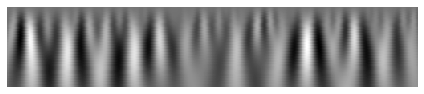

In [17]:
some_cwt = pd.DataFrame(cwt_data_eyes_closed[21][:51200])
some_cwt_image = some_cwt.values.reshape(100, 512)
plt.imshow(some_cwt_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("some_cwt_plot")
plt.show()

Saving figure some_cwt_plot


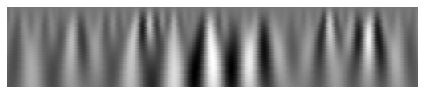

In [18]:
some_cwt = pd.DataFrame(cwt_data_eyes_open[2][:51200])
some_cwt_image = some_cwt.values.reshape(100, 512)
plt.imshow(some_cwt_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("some_cwt_plot")
plt.show()

In [19]:
eyes_open_labels = []
eyes_closed_labels = []

for cwt_row in cwt_data_eyes_open:
    eyes_open_labels.append(False)
for cwt_row in cwt_data_eyes_closed:
    eyes_closed_labels.append(True)
    
eyes_open_labels = pd.DataFrame(eyes_open_labels)
eyes_closed_labels = pd.DataFrame(eyes_closed_labels)
eyes_open_labels

,0
0,False
1,False
2,False
3,False
4,False
...,...
100,False
101,False
102,False
103,False


In [20]:
cwt_data_eyes_open_df = pd.DataFrame(cwt_data_eyes_open)
cwt_data_eyes_closed_df = pd.DataFrame(cwt_data_eyes_closed)

mock_data = pd.concat([cwt_data_eyes_open_df, cwt_data_eyes_closed_df])
mock_data_labels = pd.concat([eyes_open_labels, eyes_closed_labels])

mock_data

,0,1,2,3,4,5,6,7,8,9,...,409590,409591,409592,409593,409594,409595,409596,409597,409598,409599
0,1.172465e-06,9.590320e-07,-2.063194e-07,-1.294978e-06,-1.698074e-06,-1.648641e-06,-1.398649e-06,-9.488821e-07,-3.077633e-07,3.517458e-07,...,-3.863529e-06,-0.000003,-2.415185e-06,-0.000002,-5.964137e-07,3.819089e-07,0.000001,0.000002,3.241520e-06,4.078779e-06
1,2.200956e-06,4.141282e-06,1.684649e-06,7.259216e-08,-6.487862e-07,-1.127059e-06,-1.429699e-06,-1.616007e-06,-1.677648e-06,-1.541130e-06,...,7.115881e-06,0.000008,8.956204e-06,0.000010,1.037213e-05,1.088596e-05,0.000011,0.000011,1.154631e-05,1.146261e-05
2,5.430396e-07,2.271726e-06,5.828524e-07,-3.535792e-07,-5.062111e-07,-5.384251e-07,-5.020144e-07,-3.365619e-07,-7.185276e-08,1.894110e-07,...,8.234581e-06,0.000010,1.099769e-05,0.000012,1.274305e-05,1.321707e-05,0.000013,0.000013,1.312158e-05,1.263807e-05
3,5.602932e-08,-4.301631e-07,-2.733119e-07,-1.278130e-07,-2.575002e-08,1.147212e-07,2.106823e-07,2.069019e-07,1.644914e-07,1.447302e-07,...,1.955655e-06,0.000002,2.240783e-06,0.000002,2.088699e-06,1.883450e-06,0.000002,0.000001,9.582387e-07,6.059182e-07
4,6.711790e-08,3.034324e-09,-4.343287e-07,-3.882353e-07,-1.032854e-07,1.586533e-07,3.536505e-07,4.434236e-07,3.924587e-07,2.658634e-07,...,2.501849e-06,0.000001,-3.365482e-07,-0.000002,-3.181315e-06,-4.512884e-06,-0.000006,-0.000007,-7.769610e-06,-8.531584e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,8.422112e-08,-1.247123e-06,-8.223202e-07,-5.760886e-07,-4.737262e-07,-2.825035e-07,-3.760176e-08,2.827270e-07,6.449609e-07,8.795698e-07,...,-4.925874e-07,-0.000001,-2.342371e-06,-0.000003,-3.728376e-06,-4.233516e-06,-0.000005,-0.000005,-5.009267e-06,-5.040416e-06
74,-1.039103e-06,5.673938e-06,4.248633e-06,2.742654e-06,2.122044e-06,1.521363e-06,8.247372e-07,2.806990e-08,-7.144079e-07,-1.210217e-06,...,-8.664378e-07,-0.000002,-2.274136e-06,-0.000003,-3.585767e-06,-4.157786e-06,-0.000005,-0.000005,-5.365379e-06,-5.567902e-06
75,9.785859e-07,-1.145215e-07,-4.928631e-07,-8.614673e-07,-1.301219e-06,-1.528139e-06,-1.321275e-06,-6.998532e-07,7.024555e-08,7.226103e-07,...,-2.950050e-06,-0.000006,-9.042383e-06,-0.000012,-1.447077e-05,-1.681237e-05,-0.000019,-0.000021,-2.189158e-05,-2.285394e-05
76,-1.332204e-06,-7.819992e-06,-3.075824e-06,-3.629436e-07,1.211917e-07,2.689264e-07,3.132156e-07,3.877486e-07,5.887862e-07,8.247181e-07,...,2.655545e-05,0.000028,2.881287e-05,0.000029,2.936827e-05,2.902068e-05,0.000028,0.000027,2.573102e-05,2.399570e-05


In [21]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(mock_data, test_size=0.2, random_state=42)
train_set_labels, test_set_labels = train_test_split(mock_data_labels, test_size=0.2, random_state=42)

train_set_labels_eyes_closed = (train_set_labels.values.ravel() == True)
test_set_labels_eyes_closed = (test_set_labels.values.ravel() == True)

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=52)

forest_clf.fit(train_set, train_set_labels_eyes_closed)

RandomForestClassifier(random_state=52)

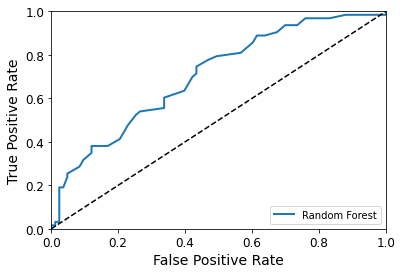

In [22]:
from sklearn.model_selection import cross_val_predict

y_probas_forest = cross_val_predict(forest_clf, train_set, train_set_labels_eyes_closed, cv=3,
                                    method="predict_proba")

from sklearn.metrics import roc_curve
y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_set_labels_eyes_closed,y_scores_forest)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [23]:
from sklearn.metrics import roc_auc_score
roc_auc_score(train_set_labels_eyes_closed, y_scores_forest)

0.7036718301778544

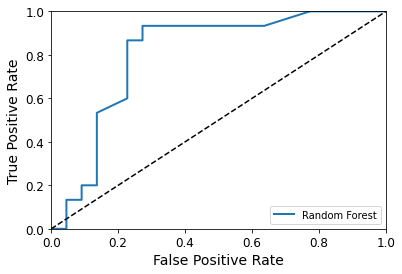

In [24]:
y_probas_forest_test = cross_val_predict(forest_clf, test_set, test_set_labels_eyes_closed, cv=3,
                                    method="predict_proba")

y_scores_forest_test = y_probas_forest_test[:, 1]   # score = proba of positive class
fpr_forest_test2, tpr_forest_test2, thresholds_forest_test2 = roc_curve(test_set_labels_eyes_closed,y_scores_forest_test)

plot_roc_curve(fpr_forest_test2, tpr_forest_test2, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [25]:
roc_auc_score(test_set_labels_eyes_closed, y_scores_forest_test)

0.8045454545454546

In [26]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_set, train_set_labels_eyes_closed)

SGDClassifier(random_state=42)

In [27]:
y_train_pred = cross_val_predict(sgd_clf, train_set, train_set_labels_eyes_closed, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(train_set_labels_eyes_closed, y_train_pred)

array([[56, 27],
       [42, 21]], dtype=int64)

In [28]:
from sklearn.ensemble import BaggingClassifier

sgd_clf = BaggingClassifier(random_state=42)
sgd_clf.fit(train_set, train_set_labels_eyes_closed)

BaggingClassifier(random_state=42)

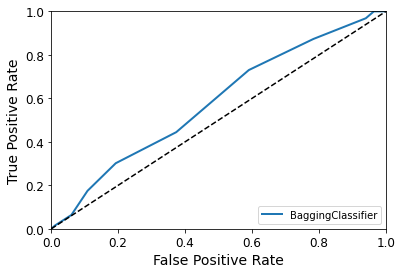

In [29]:
from sklearn.model_selection import cross_val_predict

y_probas_forest = cross_val_predict(sgd_clf, train_set, train_set_labels_eyes_closed, cv=3,
                                    method="predict_proba")

from sklearn.metrics import roc_curve
y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_set_labels_eyes_closed,y_scores_forest)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


plot_roc_curve(fpr_forest, tpr_forest, "BaggingClassifier")
plt.legend(loc="lower right")
plt.show()

In [30]:
from sklearn.ensemble import ExtraTreesClassifier

sgd_clf = ExtraTreesClassifier(random_state=42)
sgd_clf.fit(train_set, train_set_labels_eyes_closed)

ExtraTreesClassifier(random_state=42)

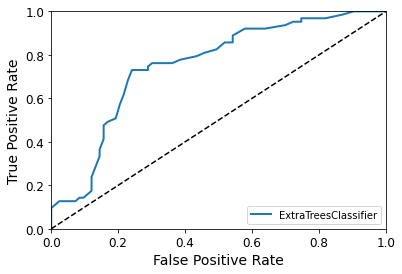

In [31]:
y_probas_forest = cross_val_predict(sgd_clf, train_set, train_set_labels_eyes_closed, cv=3,
                                    method="predict_proba")

y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_set_labels_eyes_closed,y_scores_forest)

plot_roc_curve(fpr_forest, tpr_forest, "ExtraTreesClassifier")
plt.legend(loc="lower right")
plt.show()

In [32]:
from sklearn.ensemble import RandomTreesEmbedding

sgd_clf = RandomTreesEmbedding(random_state=42)
sgd_clf.fit(train_set, train_set_labels_eyes_closed)

RandomTreesEmbedding(random_state=42)

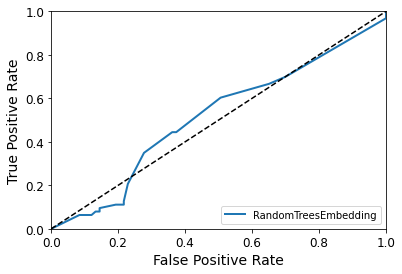

In [33]:
y_probas_forest = cross_val_predict(sgd_clf, train_set, train_set_labels_eyes_closed, cv=3,
                                    method="apply")

y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_set_labels_eyes_closed,y_scores_forest)

plot_roc_curve(fpr_forest, tpr_forest, "RandomTreesEmbedding")
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

sgd_clf = AdaBoostClassifier(random_state=42)
sgd_clf.fit(train_set, train_set_labels_eyes_closed)


In [ ]:
y_probas_forest = cross_val_predict(sgd_clf, train_set, train_set_labels_eyes_closed, cv=3,
                                    method="predict_proba")

y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_set_labels_eyes_closed,y_scores_forest)

plot_roc_curve(fpr_forest, tpr_forest, "RandomTreesEmbedding")
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

sgd_clf = GradientBoostingClassifier(random_state=42)
sgd_clf.fit(train_set, train_set_labels_eyes_closed)

In [ ]:
y_probas_forest = cross_val_predict(sgd_clf, train_set, train_set_labels_eyes_closed, cv=3,
                                    method="predict_proba")

y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_set_labels_eyes_closed,y_scores_forest)

plot_roc_curve(fpr_forest, tpr_forest, "RandomTreesEmbedding")
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_score(train_set_labels_eyes_closed, y_scores_forest)